## Predicting breast cancer from digitized images of breast mass

by Tiffany A. Timbers, Joel Ostblom & Melissa Lee
2023/11/09

In [5]:
from IPython import display
import pandas as pd

# Summary

Here we attempt to build a classification model using the k-nearest neighbours algorithm which can use breast cancer tumour image measurements to predict whether a newly discovered breast cancer tumour is benign (i.e., is not harmful and does not require treatment) or malignant (i.e., is harmful and requires treatment intervention). Our final classifier performed fairly well on an unseen test data set, with the F2 score, where beta = 2, of 0.96 and an overall accuracy calculated to be 0.96. On the 171 test data cases, it correctly predicted 168. It incorrectly predicted 3 cases, which were all false positives - predicting that a tumour is malignant when in fact it is benign. These kind of incorrect predictions is not as harmful as a false negative in our context. Although they could theoretically cause the patient to undergo unnecessary treatment if the model is used as a decision tool, it is likely that the model is used for initial screening and that there will be a follow up appointment and further testing until treatment commences. As such, we believe this model is at, or close to, the performance required for it to have clinical utility, although further research to improve the model performance and understand the characteristics of incorrectly predicted patients would still be useful.

# Introduction

Women have a 12.1% lifetime probability of developing breast cancer, and although cancer treatment has improved over the last 30 years, the projected death rate for women's breast cancer is 22.4 deaths per 100,000 in 2019 (Canadian Cancer Statistics Advisory Committee 2019). Early detection has been shown to improve outcomes (Canadian Cancer Statistics Advisory Committee 2019), and thus methods, assays and technologies that help to improve diagnosis may be beneficial for improving outcomes further. 

Here we ask if we can use a machine learning algorithm to predict whether a newly discovered tumour is benign or malignant given tumour image measurements. Answering this question is important because traditional methods for tumour diagnosis are quite subjective and can depend on the diagnosing physicians skill as well as experience (Street, Wolberg, and Mangasarian 1993). Furthermore, benign tumours are not normally dangerous; the cells stay in the same place and the tumour stops growing before it gets very large. By contrast, in malignant tumours, the cells invade the surrounding tissue and spread into nearby organs where they can cause serious damage. Thus, if a machine learning algorithm can accurately and effectively predict whether a newly discovered tumour benign or malignant given tumour image measurements this could lead to less subjective, and more scalable breast cancer tumour diagnosis which could contribute to better patient outcomes.

# Methods

## Data
The data set used in this project is of digitized breast cancer image features created by Dr. William H. Wolberg, W. Nick Street, and Olvi L. Mangasarian at the University of Wisconsin, Madison (Street, Wolberg, and Mangasarian 1993).  It was sourced from the UCI Machine Learning Repository (Street, Wolberg, and Mangasarian 1993) and can be found [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)), specifically [this file](http://mlr.cs.umass.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data). Each row in the data set represents summary statistics from measurements of an image of a tumour sample, including the diagnosis (benign or malignant) and several other measurements (e.g., nucleus texture, perimeter, area, etc.). Diagnosis for each image was conducted by physicians. 

## Analysis
The k-nearest neighbors (k-nn) algorithm was used to build a classification model to predict whether a tumour mass was benign or malignant (found in the class column of the data set). All variables included in the original data set, with the exception of the standard error of fractal dimension, smoothness, symmetry and texture were used to fit the model. Data was split with 70% being partitioned into the training set and 30% being partitioned into the test set. The hyperparameter $K$ was chosen using 30-fold cross validation with the F2 score as the classification metric. Beta was chosen to be set to 2 for the F2 score to increase the weight on recall during fitting because the application is cancer screening and false negatives are very undesirable in such an application. All variables were standardized just prior to model fitting. The Python programming language (Van Rossum and Drake 2009) and the following Python packages were used to perform the analysis: requests(Reitz 2011), zipfile (Van Rossum and Drake 2009), numpy(Harris et al. 2020), Pandas (McKinney 2010), altair (VanderPlas, 2018), scikit-learn (Pedregosa et al. 2011). The code used to perform the analysis and create this report can be found here: https://github.com/ttimbers/breast_cancer_predictor_py.


# Results & Discussion

To look at whether each of the predictors might be useful to predict the tumour class, we plotted the distributions of each predictor from the training data set and coloured the distribution by class (benign: blue and malignant: orange). In doing this we see that class distributions for all of the mean and max predictors for all the measurements overlap somewhat, but do show quite a difference in their centres and spreads. This is less so for the standard error (se) predictors. In particular, the standard errors of fractal dimension, smoothness, symmetry and texture look very similar in both the distribution centre and spread. Thus, we choose to omit these from our model.

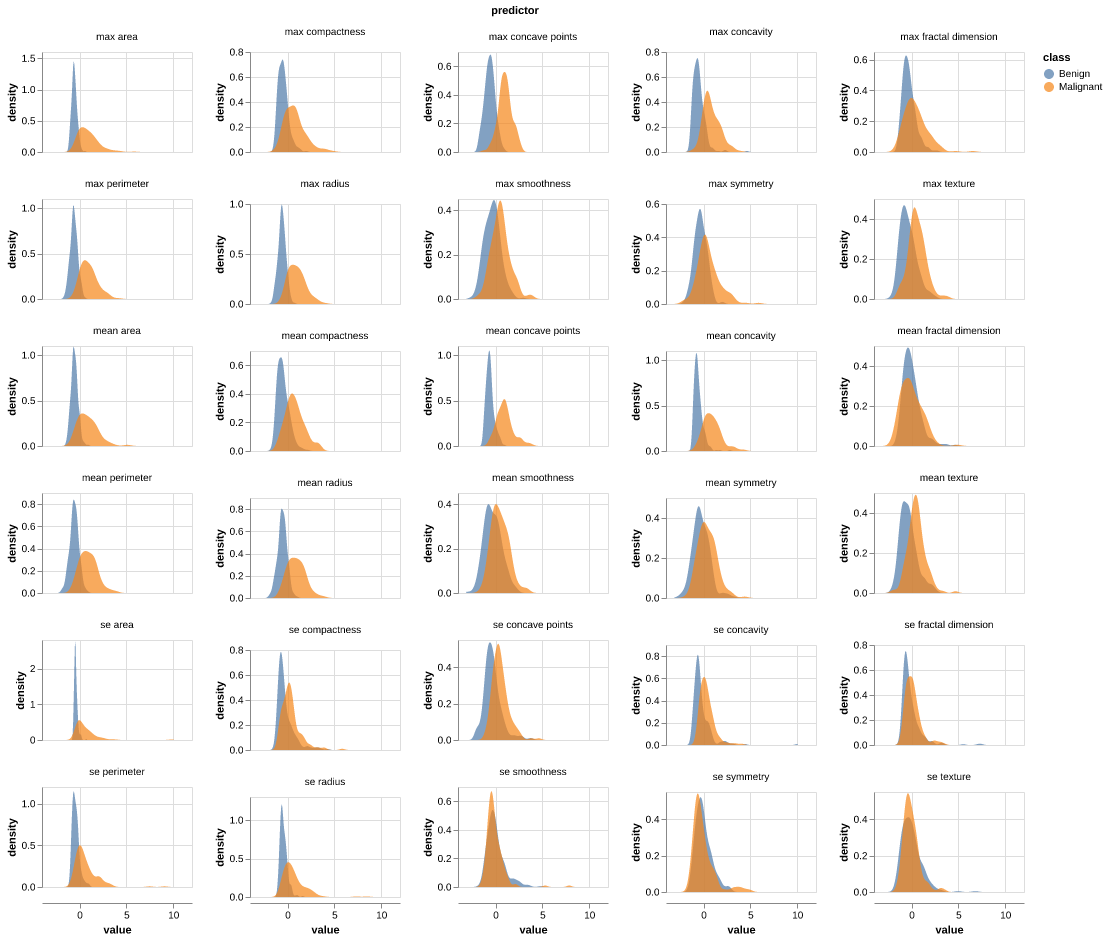

In [2]:
display.Image("../results/figures/feature_densities_by_class.png")

Figure 1. Comparison of the empirical distributions of training data predictors between benign and malignant tumour masses.

We chose to use a simple classification model using the k-nearest neighbours algorithm. To find the model that best predicted whether a tumour was benign or malignant, we performed 30-fold cross validation using F2 score (beta = 2) as our metric of model prediction performance to select K (number of nearest neighbours). We observed that the optimal K was 4.

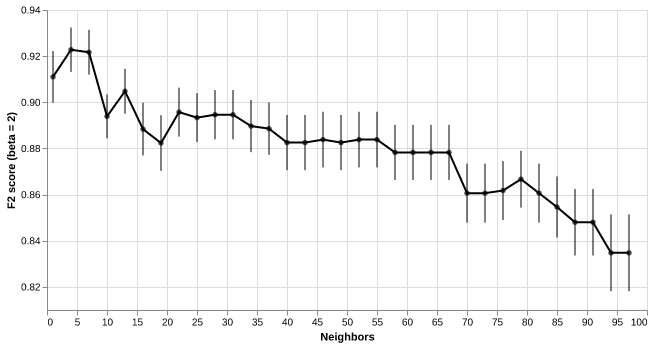

In [3]:
display.Image("../results/figures/cancer_choose_k.png")

Figure 2. Results from 30-fold cross validation to choose K. F2 score (with beta = 2) was used as the classification metric as K was varied.

In [6]:
pd.read_csv("../results/tables/test_scores.csv")

,accuracy,F2 score (beta = 2)
0,0.962145,0.962145


Our prediction model performed quite well on test data, with a final overall accuracy of 0.96 and F2 (beta = 2) score of 0.98. Other indicators that our model performed well come from the confusion matrix, where it only made 3 mistakes. All 3 mistakes were predicting a benign tumour as malignant, which is promising for implementing this in the clinic as false positives are less harmful than false negatives.

Table 1. Confusion matrix of model performance on test data.

In [11]:
pd.read_csv("../results/tables/confusion_matrix.csv")

,class,Benign,Malignant
0,Benign,107,0
1,Malignant,3,61


While the performance of this model is likely already useful as a screening tool in a clinical setting, there are several directions that could be explored for to improve it further. First, we could look closely at the 3 misclassified observations and compare them to several observations that were classified correctly (from both classes). The goal of this would be to see which feature(s) may be driving the misclassification and explore whether any feature engineering could be used to help the model better predict on observations that it currently is making mistakes on. Additionally, we would try seeing whether we can get improved predictions using other classifiers. One classifier we might try is random forest forest because it automatically allows for feature interaction, where k-nn does not. Finally, we also might improve the usability of the model in the clinic if we output and report the probability estimates for predictions. If we cannot prevent misclassifications through the approaches suggested above, at least reporting a probability estimates for predictions would allow the clinician to know how confident the model was in its prediction. Thus the clinician may then have the ability to perform additional diagnostic assays if the probability estimates for prediction of a given tumour class is not very high.

# References

Canadian Cancer Statistics Advisory Committee. 2019. “Canadian Cancer Statistics.” Canadian Cancer Society. http://cancer.ca/Canadian-Cancer-Statistics-2019-EN.

Dua, Dheeru, and Casey Graff. 2017. “UCI Machine Learning Repository.” University of California, Irvine, School of Information; Computer Sciences. http://archive.ics.uci.edu/ml.

Harris, C.R. et al., 2020. Array programming with NumPy. Nature, 585, pp.357–362.

Jed Wing, Max Kuhn. Contributions from, Steve Weston, Andre Williams, Chris Keefer, Allan Engelhardt, Tony Cooper, Zachary Mayer, et al. 2019. Caret: Classification and Regression Training. https://CRAN.R-project.org/package=caret.

McKinney, Wes. 2010. “Data Structures for Statistical Computing in Python.” In Proceedings of the 9th Python in Science Conference, edited by Stéfan van der Walt and Jarrod Millman, 51–56.

Pedregosa, F. et al., 2011. Scikit-learn: Machine learning in Python. Journal of machine learning research, 12(Oct), pp.2825–2830.

Reitz, Kenneth. 2011. Requests: HTTP for Humans. https://requests.readthedocs.io/en/master/.

Street, W. Nick, W. H. Wolberg, and O. L. Mangasarian. 1993. “Nuclear feature extraction for breast tumor diagnosis.” In Biomedical Image Processing and Biomedical Visualization, edited by Raj S. Acharya and Dmitry B. Goldgof, 1905:861–70. International Society for Optics; Photonics; SPIE. https://doi.org/10.1117/12.148698.

VanderPlas, J. et al., 2018. Altair: Interactive statistical visualizations for python. Journal of open source software, 3(32), p.1057.

Van Rossum, Guido, and Fred L. Drake. 2009. Python 3 Reference Manual. Scotts Valley, CA: CreateSpace.
